[[5.84]
 [9.06]
 [4.76]
 [5.05]
 [5.87]
 [7.89]
 [8.41]
 [8.21]
 [5.  ]
 [8.97]
 [8.65]
 [5.2 ]
 [4.67]
 [5.32]
 [9.01]
 [5.79]
 [7.77]
 [8.3 ]
 [5.44]
 [8.86]
 [5.01]
 [8.58]
 [8.14]
 [8.35]
 [8.34]
 [8.72]
 [8.91]
 [4.79]
 [4.98]
 [8.78]
 [7.87]
 [5.85]
 [8.97]
 [8.86]
 [4.78]
 [6.33]
 [5.94]
 [5.88]
 [7.9 ]
 [8.79]
 [4.88]
 [4.91]
 [9.18]
 [5.01]
 [8.94]
 [5.21]
 [8.09]
 [5.81]
 [9.13]
 [5.15]
 [7.93]
 [5.85]
 [5.74]
 [8.61]
 [8.6 ]
 [7.93]
 [6.01]
 [8.26]
 [8.43]
 [8.88]
 [6.14]
 [6.01]
 [5.97]
 [7.47]
 [8.81]
 [4.68]
 [6.05]
 [8.33]
 [8.79]
 [5.67]
 [7.97]
 [8.78]
 [9.23]
 [7.84]
 [4.98]
 [6.17]
 [9.03]
 [8.31]
 [8.04]
 [4.95]]
intercept 74.71515386309434
cof [3.98313343]
    Actual   predicted
0      113   97.976653
1      120  110.802343
2       90   93.674869
3       86   94.829978
4      108   98.096147
..     ...         ...
75     110   99.291087
76     118  110.682849
77      95  107.814993
78      94  106.739547
79      88   94.431664

[80 rows x 2 columns]
Mean Absolut Er

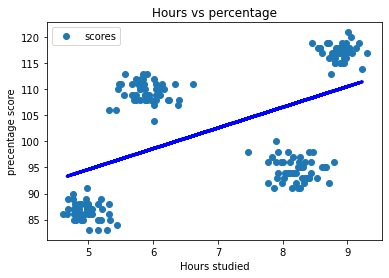

In [8]:
import pandas as pd 
import numpy as np
import matplotlib.pyplot as plt
dataset = pd.read_csv('student1.csv')
dataset.shape
dataset.head()



x = dataset.iloc[:, :-1].values
y = dataset.iloc[:, 1].values

from sklearn.model_selection import train_test_split
x_train, x_test, y_train, y_test = train_test_split(x,y, test_size=0.4, random_state=0)

print(x_test)
from sklearn.linear_model import LinearRegression
regressor = LinearRegression()
regressor.fit(x_train, y_train)
print("intercept",regressor.intercept_)
print("cof",regressor.coef_)
y_pred = regressor.predict(x_test)
df = pd.DataFrame({'Actual': y_test, 'predicted': y_pred})
print(df)

from sklearn import metrics
print('Mean Absolut Error', metrics.mean_absolute_error(y_test, y_pred))
print('Mean Squard Error', metrics.mean_squared_error(y_test, y_pred))
print('Root Squard Error', np.sqrt(metrics.mean_squared_error(y_test, y_pred)))

dataset.plot(x='Hours', y='scores', style='o')
plt.title('Hours vs percentage')
plt.xlabel('Hours studied')
plt.ylabel('precentage score')
plt.plot(x_test, y_pred, color="blue", linewidth=3)
plt.show()


import pandas as pd
import numpy as np
 #from sklearn import svm
df=pd.read_csv ('diabetes.csv')
x=df.drop('Outcome',1)
y=df['Outcome']
from sklearn.model_selection import train_test_split
x_train,x_test,y_train,y_test=train_test_split (x, y, test_size=0.25)
from sklearn.ensemble import RandomForestClassifier
clf =RandomForestClassifier(n_estimators=1)
#clf =svm.SVC(kernel="rpf")
clf.fit(x_train,y_train)
accuracy=clf.score(x_train,y_train)

print(accuracy*100)
from sklearn.metrics import classification_report
from sklearn.metrics import confusion_matrix
ypredict=clf.predict(x_train)
print( classification_report(y_train,ypredict))
print (confusion_matrix(y_train,ypredict))

import pandas as pd 
data=pd.read_csv('diabetics.csv') 
X=data.drop('outcome',1)
y=data['outcome']
from sklearn.model_selection import train_test_split
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import accuracy_score
from sklearn.metrics import confusion_matrix


rf = RandomForestClassifier(n_estimators = 10)

from sklearn.model_selection import KFold
k=5
kfold =KFold(n_splits=k, random_state=None, shuffle=False)

acclist=[]


for train_index, test_index in kfold.split(X):
    X_train , X_test = X.iloc[train_index,:],X.iloc[test_index,:]
    y_train , y_test = y[train_index] , y[test_index]
    rf.fit(X_train, y_train)
    predictions = rf.predict(X_test)
    
    from sklearn.metrics import confusion_matrix
    matrix = confusion_matrix(y_test, predictions)
    
    
    from sklearn.metrics import accuracy_score
    acc=accuracy_score(y_test,predictions)
    acclist.append(acc)
    
acc=sum(acclist)/k
print(acc)

import pandas as pd
import numpy as np
from sklearn.decomposition import PCA
import matplotlib.pyplot as plt
df=pd.read_csv('diabetics.csv')
X=df.drop('outcome',1)
y=df['outcome']
pca = PCA(n_components=5)
principalComponents = pca.fit_transform(X)
principalDf = pd.DataFrame(data = principalComponents
           , columns = ['A', 'B','C','D','E'])
finalDf = pd.concat([principalDf,y], axis = 1)

finalDf.to_csv("pcadata.csv",index = False, header=True)
exvar= pca.explained_variance_ratio_
cexvarsum = np.cumsum(exvar)
print(exvar)
plt.bar(range(0,len(exvar)), exvar, label='Individual explained variance')
plt.step(range(0,len(cexvarsum)), cexvarsum ,label='Cumulative explained variance')
plt.ylabel('Explained variance ratio')
plt.xlabel('Principal component index')
plt.legend(loc='lower right')

plt.show()